In [2]:
import pandas as pd

### Q1. What will be the predicted score if a student study for 9.25 hr in a day.

In [3]:
#importing data
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
#Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data has no missing values. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
import seaborn as sns

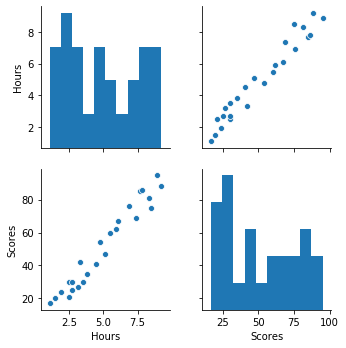

In [9]:
sns.pairplot(df)

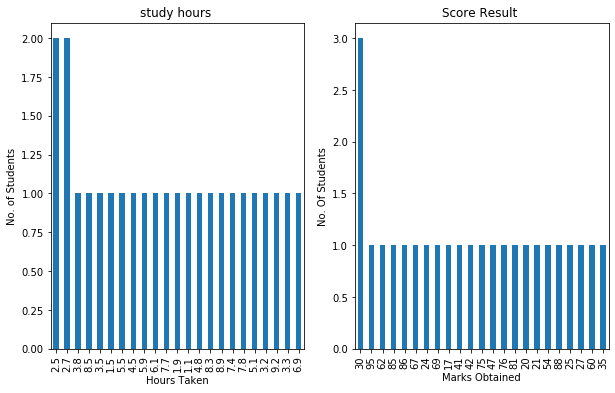

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.Hours.value_counts().plot.bar()
plt.xlabel('Hours Taken')
plt.ylabel('No. of Students')
plt.title('study hours ')
plt.subplot(1,2,2)
df.Scores.value_counts().plot.bar()
plt.xlabel('Marks Obtained')
plt.ylabel('No. Of Students')
plt.title('Score Result ')
plt.show()

Bar Plots above show the hours taken and marks obtained by number of students represented on Y-Axis.

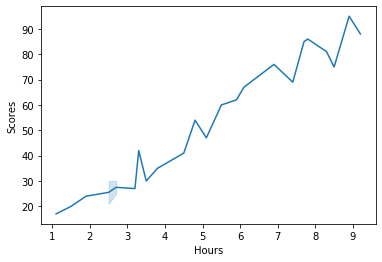

In [11]:
sns.lineplot(x="Hours",y="Scores",data=df)

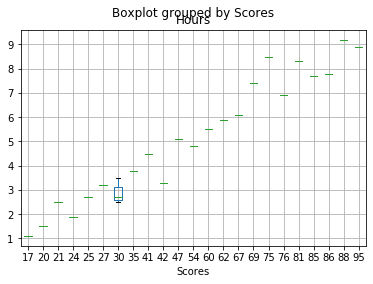

In [12]:
# Boxplot of Hours and Score
df.boxplot(column='Hours', by='Scores')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
#Feature Selection
#In this data hours is independent feature and score is dependant feature.
#As using only single feature it is mandatory to reshape array in (-1,1) format.
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [15]:
#Doing Train-Test Split and taking the test data as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

In [16]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#coefficient & intercept
a = model.coef_
b=model.intercept_

In [19]:
a

array([9.90957862])

In [20]:
b

1.1192869460124797

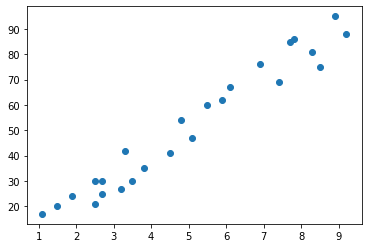

In [21]:
line= a*X+b
fig=plt.figure()
axes=fig.add_subplot(111)
axes.scatter(X,y)

In [22]:
#Prediction
y_pred= model.predict(X_test)
y_pred

array([51.65813792, 61.56771655, 33.8208964 , 15.98365488, 55.62196937])

In [23]:
#Actual vs Predicted Scores
df1 = pd.DataFrame({'Actual Scores':y_test, 'Predicted Scores':y_pred})
df1

,Actual Scores,Predicted Scores
0,47,51.658138
1,67,61.567717
2,42,33.820896
3,20,15.983655
4,60,55.621969


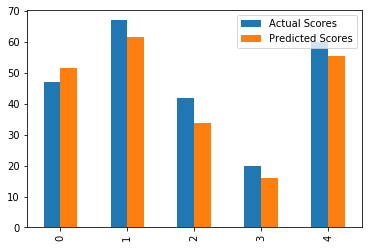

In [24]:
#Graph for actual vs predicted
df1.plot(kind='bar')

In [25]:
#Score to be achieved if student studied for 9.25 hr
hr=9.25
pred= model.predict([[hr]])

In [26]:
#Predicted Score
print(pred)

[92.78288921]


### Evaluating the model

In [27]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error(MAE):", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 5.332780144143608
Mean Squared Error(MSE): 30.680773676057676
Root Mean Squared Error(RMSE): 5.539022808768499


In [31]:
print("Error:",abs(y_pred - y_test))
print("Mean Absolute Percentage Error(MAPE):",100*(abs(y_pred - y_test)/y_test))
print("Accuracy:",round (100 - np.mean(100*(abs(y_pred - y_test)/y_test)),2))

Error: [4.65813792 5.43228345 8.1791036  4.01634512 4.37803063]
Mean Absolute Percentage Error(MAPE): [ 9.91093175  8.10788575 19.47405618 20.0817256   7.29671771]
Accuracy: 87.03


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8840309431657934

Since R2 score is greater than 0.8 it is a good model to deploy.